# Reading and writing files in NumPy

## Reference documentation

https://docs.scipy.org/doc/numpy/reference/routines.io.html

## Using built-in storage format

Numpy arrays can be save to disk in a special NumPy format .npy. An array is saved using the save() function. This function takes a file object or a filename as input.

In [81]:
import numpy as np

arr1 = np.random.rand(200,100)
np.save('test', arr1)
%ls test.npy

 Volume in drive D is Data
 Volume Serial Number is 4ACC-CB3F

 Directory of D:\Users\Jonas\Box Sync\Lunarc\SeSE\IntroCourse\data

2017-06-11  18:13           160ÿ080 test.npy
               1 File(s)        160ÿ080 bytes
               0 Dir(s)  67ÿ494ÿ899ÿ712 bytes free


The array can be read back using the load() function:

In [15]:
loaded_arr = np.load('test.npy')
print(loaded_arr.shape)

(200, 100)


A file object can be used to load and store arrays to instead of using a filename as input:

In [16]:
arr2 = np.random.rand(300,200)
arr3 = np.random.rand(200,300)
array_file = open('array_file.dat', 'wb')
np.save(array_file, arr2)
np.save(array_file, arr3)
array_file.close()

In this case we store 2 array objects in a single binary file, which then can be read back with:

In [17]:
array_file = open('array_file.dat', 'rb')
loaded_arr2 = np.load(array_file)
loaded_arr3 = np.load(array_file)
array_file.close()
print(loaded_arr2.shape)
print(loaded_arr3.shape)

(300, 200)
(200, 300)


In [79]:
%ls array_file.dat

 Volume in drive D is Data
 Volume Serial Number is 4ACC-CB3F

 Directory of D:\Users\Jonas\Box Sync\Lunarc\SeSE\IntroCourse\data

2017-06-11  17:00           960ÿ160 array_file.dat
               1 File(s)        960ÿ160 bytes
               0 Dir(s)  67ÿ494ÿ899ÿ712 bytes free


## Using buil-in compressed/archive storage format

NumPy can also write multiple arrays to disk in a compressed/uncompressed format .npz. This is acomplished usingt eht savez()/savez_compressed() functions. The methods can also write several arrays in a single call:

In [29]:
np.savez('array_file', arr1, arr2, arr3)
np.savez_compressed('array_file_compressed', arr1, arr2, arr3)

In [82]:
%ls array_file.npz

 Volume in drive D is Data
 Volume Serial Number is 4ACC-CB3F

 Directory of D:\Users\Jonas\Box Sync\Lunarc\SeSE\IntroCourse\data

2017-06-11  17:08         1ÿ120ÿ544 array_file.npz
               1 File(s)      1ÿ120ÿ544 bytes
               0 Dir(s)  67ÿ494ÿ834ÿ176 bytes free


Loading arrays from compressed archives is done using the normal load() function.

In [33]:
npz_file = np.load('array_file.npz')
npz_file_compressed = np.load('array_file_compressed.npz')
print(npz_file.files)
print(npz_file_compressed.files)

['arr_0', 'arr_1', 'arr_2']
['arr_0', 'arr_1', 'arr_2']


In [39]:
arr_0 = npz_file['arr_0']
print(arr_0.shape)

(200, 100)


## Reading and writing text files

Often you need to read arrays from text files with the typical format like in the uvw.dat file:

    variables="x","y","z","u","v","w"
    zone i=96,j=65,k=48,f=point
    0 -1 0 -7.00895e-05 2.28715e-05 7.11905e-05
    0.0327249 -1 0 -8.01278e-05 1.89072e-05 4.83821e-05
    0.0654498 -1 0 -6.8715e-05 8.60358e-06 -1.31806e-06
    0.0981748 -1 0 -3.79768e-05 -4.03025e-06 -5.09628e-05
    0.1309 -1 0 -8.62436e-06 -1.93002e-05 -9.18307e-05
    0.163625 -1 0 5.18301e-06 -2.96726e-05 -8.77444e-05
    0.19635 -1 0 3.97951e-06 -2.64684e-05 -4.38229e-05

In this case we need to skip the first 2 lines of header information. The file can be read in NumPy using the loadtxt() function. This function has a special argument, skiprows, which tells loadtxt to skip a specific number of rows. 

Loading the array from the uvw.dat file then becomes:

In [42]:
uvw_arr = np.loadtxt('uvw.dat', skiprows=2)
print(uvw_arr.shape)

(299520, 6)


All the data input functions in this section are implemented i C and very efficient. Try to use the built-in functions before implementing your own data reading functions.

It is also possible to write an array to a text file for further processing in other software packages, this is done using the savetxt() function.

In [50]:
text_array = np.random.rand(10,4)
np.savetxt('text_array.txt', text_array)
%pycat text_array.txt

In [51]:
text_array = np.random.rand(10,4)
np.savetxt('text_array.txt', text_array, delimiter=',')
%pycat text_array.txt

In [52]:
text_array = np.random.rand(10,4)
np.savetxt('text_array.txt', text_array, delimiter=',', fmt='%.4f')
%pycat text_array.txt

In [53]:
text_array = np.random.rand(10,4)
np.savetxt('text_array.txt', 
           text_array, delimiter=',', 
           fmt='%.4f', 
           header = 'This is the header', 
           footer='This is the footer')
%pycat text_array.txt

## Reading and writing binary files

In [73]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.misc as spm

We load a PNG-file as example data

In [74]:
mos_image = spm.imread('MOS6581.png')
print(mos_image.shape, mos_image.dtype)

(359, 500, 3) uint8


We save this image as a raw binary file using the tofile() function.

In [76]:
mos_image.tofile('MOS6581.raw')
%ls MOS6581.raw

 Volume in drive D is Data
 Volume Serial Number is 4ACC-CB3F

 Directory of D:\Users\Jonas\Box Sync\Lunarc\SeSE\IntroCourse\data

2017-06-11  18:07           538ÿ500 MOS6581.raw
               1 File(s)        538ÿ500 bytes
               0 Dir(s)  67ÿ494ÿ899ÿ712 bytes free


Now we load the file using the fromfile() function. Remember this is pure binary data, so no structure is available from the .raw binary file. When reading binary data it is important to now the data type to be read. In this case it is unsigned 8 byte integers (uint8)

First we read the raw binary file into a numpy array with the dtype='uint8'

In [77]:
image = np.fromfile('MOS6581.raw', dtype='uint8')
print(image.shape, image.dtype)

(538500,) uint8


Next, we create a new reshaped array, image_arr, which we will display.

(359, 500, 3) uint8


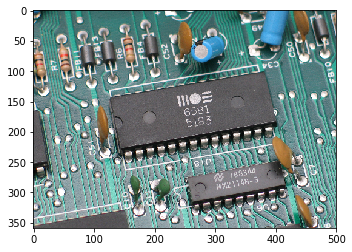

In [83]:
image_arr = image.reshape(359,500,3)
print(image_arr.shape, image_arr.dtype)
plt.imshow(image_arr)
plt.show()

## Using a DataSource object

Some times data files are located at external URL:s and needs to be downloaded. NumPy supports downloading from external URL:s using the DataSource class. When a URL is opened using this class it is downloaded locally first and can then be accessed like a normal file object in Python. Remember to open as a binary file if the file is binary.

D:\Users\Jonas\Box Sync\Lunarc\SeSE\IntroCourse\data\www.w3schools.com\css\trolltunga.jpg


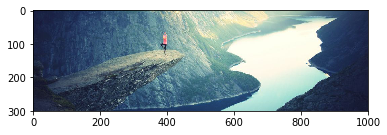

In [96]:
ds = np.DataSource()
fp = ds.open('http://www.w3schools.com/css/trolltunga.jpg', 'rb')
print(ds.abspath('http://www.w3schools.com/css/trolltunga.jpg'))
troll_image = spm.imread(fp)
plt.imshow(troll_image)
plt.show()